In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
v0x= 0
v0y=2*math.pi
x0=1
y0=0
G = 4* (math.pi)**2
M = 1

In [22]:
N=1000
tfinal=2
xt= np.empty(N)
yt= np.empty(N)
xt[0]=x0
yt[0]=y0
vxt= np.empty(N)
vyt= np.empty(N)
vxt[0]=v0x
vyt[0]=v0y
dt=tfinal/N

In [23]:
def euler():
    for i in range(N-1):
        r_abs = np.sqrt(xt[i]**2 + yt[i]**2)
        ax=-G * (M/(r_abs**2)) *(xt[i]/r_abs)
        ay=-G * (M/(r_abs**2)) *(yt[i]/r_abs)
        
        xt[i+1]=xt[i]+vxt[i]*dt
        yt[i+1]=yt[i]+vyt[i]*dt
        
        vxt[i+1]=vxt[i]+ax*dt
        vyt[i+1]=vyt[i]+ay*dt
        
    return
euler()

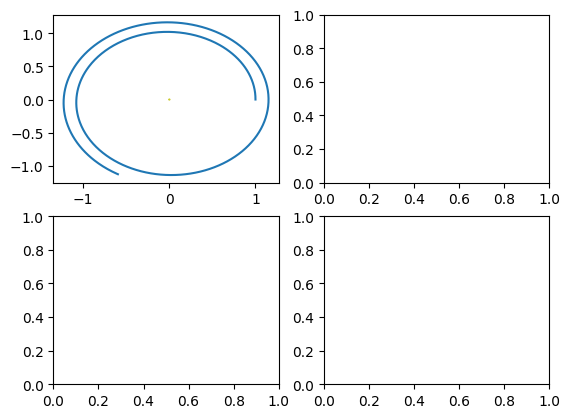

In [24]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(xt, yt, linestyle="-")
circle = patches.Circle((0, 0), 0.00465047, color='y', fill=True)
axis[0,0].add_patch(circle)

In [25]:
N=2600
tfinal=5
xt2= np.empty(N)
yt2= np.empty(N)
xt2[0]=x0
yt2[0]=y0
vxt2= np.empty(N)
vyt2= np.empty(N)
vxt2[0]=v0x
vyt2[0]=v0y
dt=tfinal/N

In [26]:
def eulercromer():
    for i in range(N-1):
        r_abs2 = np.sqrt(xt2[i]**2 + yt2[i]**2)
        ax2=-G * (M/(r_abs2**2)) *(xt2[i]/r_abs2)
        ay2=-G * (M/(r_abs2**2)) *(yt2[i]/r_abs2)

                
        vxt2[i+1]=vxt2[i]+ax2*dt
        vyt2[i+1]=vyt2[i]+ay2*dt
        
        
        xt2[i+1]=xt2[i]+vxt2[i+1]*dt
        yt2[i+1]=yt2[i]+vyt2[i+1]*dt

    return
eulercromer()

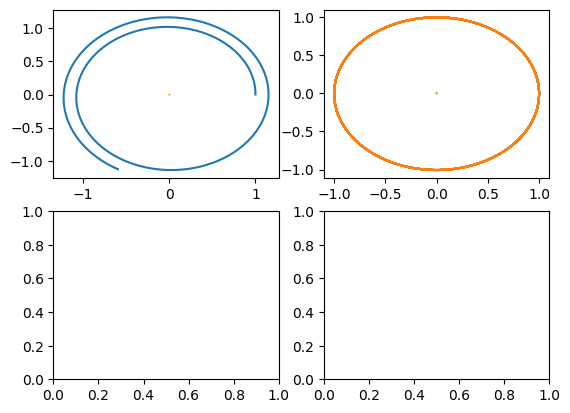

In [28]:
axis[0,1].plot(xt2, yt2, linestyle="-")
circle2 = patches.Circle((0, 0), 0.00465047, color='y', fill=True)
axis[0,1].add_patch(circle2)
figure

In [ ]:
fig, ax = plt.subplots() #criar figura
ax.plot(xt2, yt2, linestyle="-")
circle3 = patches.Circle((0, 0), 0.00465047, color='y', fill=True)
ax.add_patch(circle3)
terra = ax.plot(xt2[0],yt2[0],'o')[0] #terra, posição inicial
ax.set(xlim=[-2, 2], ylim=[-2, 2]) #fixar os limites dos eixos
def update(frame):
 # atualizar o plot da posição da Terra
 terra.set_xdata([xt2[frame]])
 terra.set_ydata([yt2[frame]])
 return terra
#criar a animação
ani = FuncAnimation(fig=fig, func=update, frames=2500, interval=1)
HTML(ani.to_jshtml())